In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from get_dataframes import get_global_df


In [3]:
global_df = get_global_df(results_path="../../../experiments/final_experiments")


<Figure size 1500x1000 with 0 Axes>

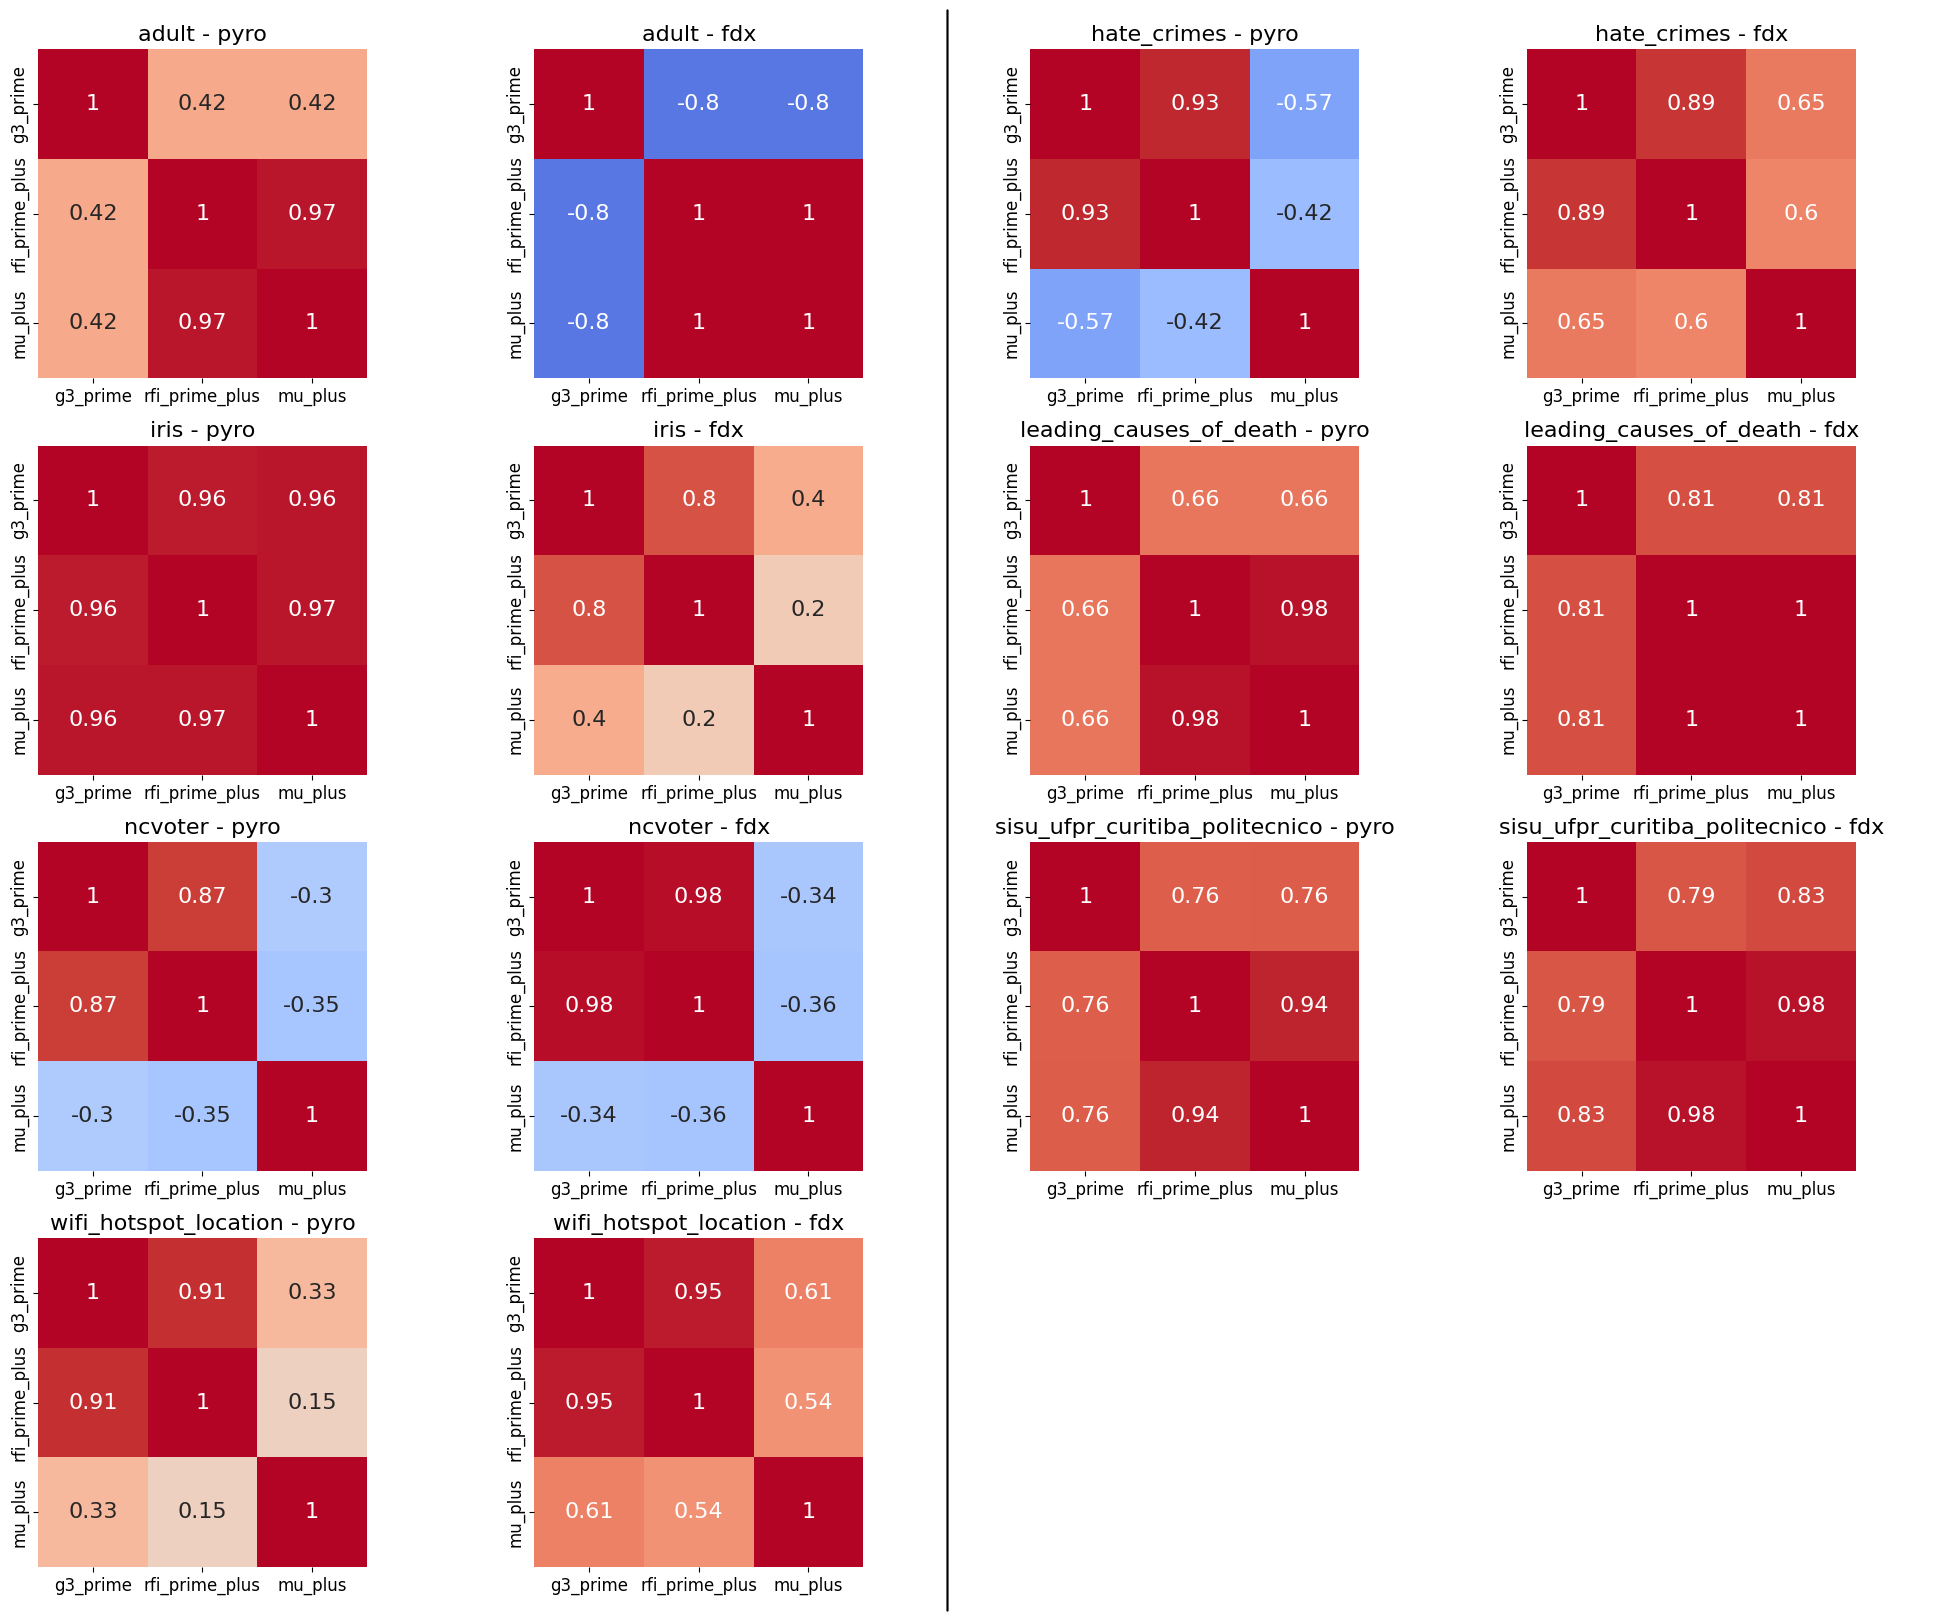

In [23]:

# Create correlation heatmaps between the three metrics for each algorithm and dataset
plt.figure(figsize=(15, 10))

# Get unique combinations of algorithm and dataset
dataset_algorithm_combinations = []
for dataset in global_df['dataset'].unique():
    for algorithm in ['pyro', 'fdx']:
        dataset_algorithm_combinations.append((dataset, algorithm))

# Calculate the grid layout dimensions
n_plots = len(dataset_algorithm_combinations)
n_cols = 4
n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
plt.subplots_adjust(hspace=0.3, wspace=0.2)  # Increased spacing for more columns
axes = axes.flatten() if n_plots > 1 else [axes]

# Organize by dataset for better comparison
organized_combinations = []
for i in range(0, len(dataset_algorithm_combinations), 2):
    if i+1 < len(dataset_algorithm_combinations):
        organized_combinations.append(dataset_algorithm_combinations[i])
        organized_combinations.append(dataset_algorithm_combinations[i+1])

# Create a correlation heatmap for each combination
for i, (dataset, algorithm) in enumerate(organized_combinations):
    if i < len(axes):
        subset_df = global_df[(global_df['dataset'] == dataset) & 
                              (global_df['algorithm'] == algorithm)]
        
        metrics_df = subset_df[['g3_prime', 'rfi_prime_plus', 'mu_plus']]
        
        corr_matrix = metrics_df.corr(method='spearman')
        
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
                   square=True, ax=axes[i], cbar=False, annot_kws={"size": 16})
        
        axes[i].set_title(f'{dataset} - {algorithm}', fontsize=16)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=12)
        axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Add vertical divider line between columns 2 and 3
for row in range(n_rows):
    if row < n_rows:
        # Calculate the position for the divider line
        x_pos = 2 * (1.0 / n_cols)  # Position after column 2
        line = plt.Line2D([x_pos, x_pos], [0, 1], transform=fig.transFigure, color='black', linestyle='-', linewidth=1)
        fig.add_artist(line)

plt.tight_layout()
plt.show()

